## Observations and Insights

# 

## Dependencies


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from tabulate import tabulate
%matplotlib inline

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mice_study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

## Summary Statistics

In [2]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the combined data frame by Drug Regimen
drug_regimen_tumor_volumes = mice_study_data.groupby(['Drug Regimen'])

# Calculate mean of the tumor volumes for each regimen
mean_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].mean()

# Calculate median of the tumor volumes for each regimen
median_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].median()

# Calculate unbiased variance of the tumor volumes for each regimen
var_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].var()

# Calculate standard deviation of the tumor volumes for each regimen
std_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].std()

# Calculate unbiased SEM (standard error of the mean) of the tumor volumes for each regimen
sem_tumor_volume = drug_regimen_tumor_volumes['Tumor Volume (mm3)'].sem()

# Save tumor volume statistics to a summary data frame
tumor_volumes_stats_summary = pd.DataFrame( {'Mean Tumor Volume': mean_tumor_volume, 'Median Tumor Volume': median_tumor_volume, 'Variance in Tumor Volume': var_tumor_volume, 'Std Deviation in Tumor Volume': std_tumor_volume, 'SEM for Tumor Volume': sem_tumor_volume} )

# Print tumor volume summary data frame sorted on lowest to highest values for SEM Tumor Volume 
tumor_volumes_stats_summary = tumor_volumes_stats_summary.sort_values('SEM for Tumor Volume')
tumor_volumes_stats_summary

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Std Deviation in Tumor Volume,SEM for Tumor Volume
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

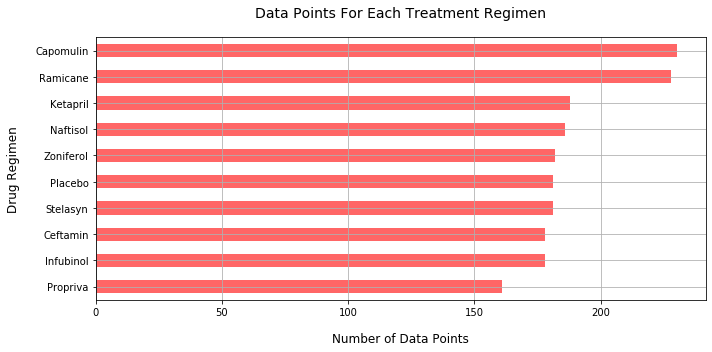

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Get the number of data points from the grouped drug regimen data frame
data_points = drug_regimen_tumor_volumes['Mouse ID'].count()
drug_regimen_data_points = pd.DataFrame({'Data Points': data_points})
# Sort the data points in descending order for plotting purposes
drug_regimen_data_points = drug_regimen_data_points.sort_values('Data Points', ascending=False)

# Generate a horizontal bar plot using pandas DataFrame.plot()
data_points_axes = drug_regimen_data_points.plot.barh(figsize=(10,5), alpha=0.6, legend=False, color='red')
data_points_axes.set_title('Data Points For Each Treatment Regimen', fontsize=14, pad=20)
data_points_axes.set_xlabel('Number of Data Points', fontsize=12, labelpad=15)
data_points_axes.set_ylabel('Drug Regimen', fontsize=12, labelpad=15)
data_points_axes.invert_yaxis()
data_points_axes.grid(True)
plt.tight_layout()
plt.show()

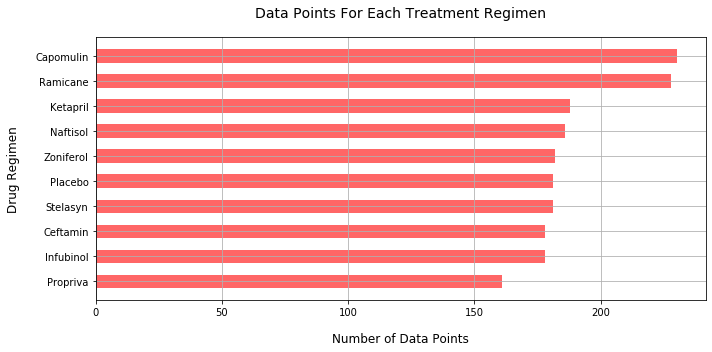

In [4]:
## Generate the same horizontal bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(drug_regimen_data_points))
drug_regimens = drug_regimen_data_points.index.tolist()
plt.figure(figsize=(10,5))
plt.barh(x_axis, drug_regimen_data_points['Data Points'], height=0.53, alpha=0.6, color='red')
plt.yticks(x_axis, drug_regimens)
plt.title('Data Points For Each Treatment Regimen', fontsize=14, pad=20)
plt.xlabel('Number of Data Points', fontsize=12, labelpad=15)
plt.ylabel('Drug Regimen', fontsize=12, labelpad=15)
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

## Pie Plots

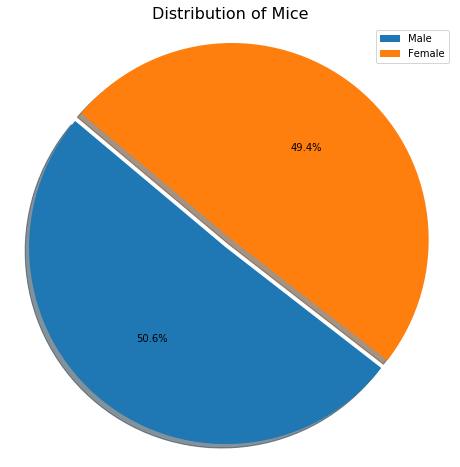

In [5]:
## Generate a pie plot showing the distribution of female versus male mice using pandas

# Get the unique sex values and count of each for all mice
mice_sex_type = mice_study_data['Sex'].unique()
mice_sex = mice_study_data['Sex'].value_counts()

# Save the sex values to a data frame for plotting purposes
mice_sex_df = pd.DataFrame({'Distribution of Mice': mice_sex})

# Plot the pie to show distribution of mice using pandas
explode = (0.05, 0)
mice_axes = mice_sex_df.plot.pie(y=0, explode=explode, labels=['',''], autopct="%1.1f%%", shadow=True, startangle=140, figsize=(8, 8))
mice_axes.set_title('Distribution of Mice', fontsize=16)
mice_axes.set_ylabel('')
mice_axes.legend(mice_sex_type)
mice_axes.axis('equal')
plt.show()

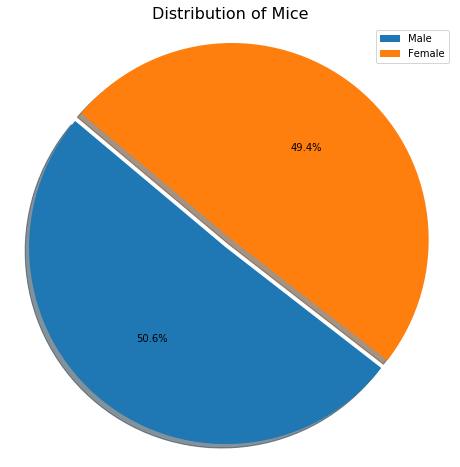

In [6]:
### Generate the same pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(8,8))
plt.pie(mice_sex, explode=explode, labels=['',''], autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('Distribution of Mice', fontsize=16)
plt.legend(mice_sex_type)
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
## Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
## Calculate the IQR and quantitatively determine if there are any potential outliers.

# Function analyzes tumor volume outliers for the promising drug regimens that we are interested in
def analyze_tumor_volume_outliers(final_tumor_volume_data, promising_drug_regimen):

    # Calculate the quartiles and IQR for the final tumor volumes
    tumor_volume_quartiles = final_tumor_volume_data['Tumor Volume (mm3)'].quantile([0.25,0.50,0.75])
    tumor_volume_lowerq = tumor_volume_quartiles[0.25]
    tumor_volume_median = tumor_volume_quartiles[0.50]
    tumor_volume_upperq = tumor_volume_quartiles[0.75]
    tumor_volume_iqr = tumor_volume_upperq - tumor_volume_lowerq
    # Determine bounds for outliers
    lower_bound = tumor_volume_lowerq - (1.5 * tumor_volume_iqr)
    upper_bound = tumor_volume_upperq + (1.5 * tumor_volume_iqr)

    # Print quantitative analysis based on the quartiles and IQR
    print("\n" + f"-" * 60)
    print(f"QUANTITATIVE ANALYSIS OF FINAL TUMOR VOLUMES FOR \'{promising_drug_regimen}\'")
    print(f"-" * 60)
    print(f"Lower Quartile (Q1): {tumor_volume_lowerq}")
    print(f"Median: {tumor_volume_median} ")
    print(f"Upper Quartile (Q3): {tumor_volume_upperq}")
    print(f"IQR: {tumor_volume_iqr}")
    print(f"Values below {lower_bound} and above {upper_bound} could be Outliers")

    # Determine details of outliers based on the calculated quartiles 
    tumor_volume_outliers = final_tumor_volume_data.loc[(final_tumor_volume_data['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_volume_data['Tumor Volume (mm3)'] > upper_bound)]
    # Print appropriate message depending on whether or not actual outliers are found in data
    if tumor_volume_outliers.empty:
        print(f"No actual Outliers were found for the {promising_drug_regimen} treatment")
    else:
        print(f"\nChecked for Outliers and found the following mice that were treated with {promising_drug_regimen}...\n")
        # Use tabulate module to pretty print the outliers table
        print(tabulate(tumor_volume_outliers.to_records(), headers = 'keys', tablefmt = 'github'))

# Save the drug regiments that we are interested in analyzing to a list
promising_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Initialize empty list to store the list of tumor volumes that we want to plot on a boxplot later
tumor_volumes_box_plots = []
# Loop through each drug regimen and call the function to analyze final tumor volumes
for promising_drug_regimen in promising_drug_regimens:
    # Filter the merged data frame the interested drug
    mice_data_promising_drugs = mice_study_data[mice_study_data['Drug Regimen'] == promising_drug_regimen]
    # Group the data frame by Timepoint ascending and grab the last subset
    # This allows us to analyse the "final" tumor volume, i.e. tumor volume taken at the largest Timepoint 
    final_tumor_volume_data = mice_data_promising_drugs.sort_values('Timepoint').groupby(['Mouse ID']).last()
    # Sort the tumor volumes and append them to a list for performing quantitative analysis
    final_tumor_volume_data = final_tumor_volume_data.sort_values('Tumor Volume (mm3)', ascending=True)
    tumor_volumes_box_plots.append(final_tumor_volume_data['Tumor Volume (mm3)'].tolist())
    # Call function to perform quantitative analysis and determine outliers
    analyze_tumor_volume_outliers(final_tumor_volume_data, promising_drug_regimen)
    


------------------------------------------------------------
QUANTITATIVE ANALYSIS OF FINAL TUMOR VOLUMES FOR 'Capomulin'
------------------------------------------------------------
Lower Quartile (Q1): 32.37735684
Median: 38.125164399999996 
Upper Quartile (Q3): 40.1592203
IQR: 7.781863460000004
Values below 20.70456164999999 and above 51.83201549 could be Outliers
No actual Outliers were found for the Capomulin treatment

------------------------------------------------------------
QUANTITATIVE ANALYSIS OF FINAL TUMOR VOLUMES FOR 'Ramicane'
------------------------------------------------------------
Lower Quartile (Q1): 31.56046955
Median: 36.56165229 
Upper Quartile (Q3): 40.65900627
IQR: 9.098536719999998
Values below 17.912664470000003 and above 54.30681135 could be Outliers
No actual Outliers were found for the Ramicane treatment

------------------------------------------------------------
QUANTITATIVE ANALYSIS OF FINAL TUMOR VOLUMES FOR 'Infubinol'
--------------------------

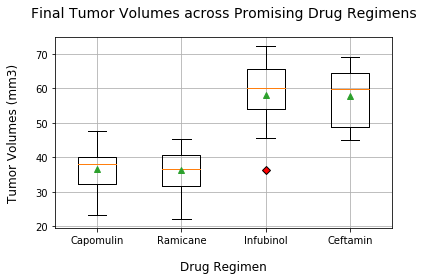

In [8]:
## Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot_fig, box_plot_ax = plt.subplots()
box_plot_ax.set_title('Final Tumor Volumes across Promising Drug Regimens', fontsize=14, pad=20)
box_plot_ax.set_ylabel('Tumor Volumes (mm3)', fontsize=12, labelpad=15)
box_plot_ax.set_xlabel('Drug Regimen', fontsize=12, labelpad=15)
red_diamond = dict(markerfacecolor='red', marker='D')
# Plot multiple boxplots on the same figure
box_plot_ax.boxplot(tumor_volumes_box_plots, labels=promising_drug_regimens, flierprops=red_diamond, showmeans=True)
box_plot_ax.grid(True)
box_plot_fig.tight_layout()
plt.show()

## Line and Scatter Plots

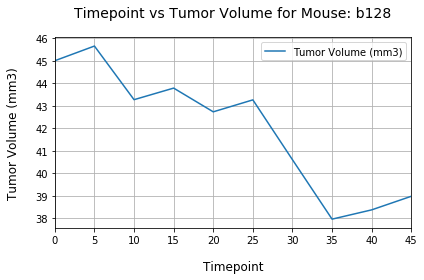

In [9]:
## Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin

# Filter the merged data frame to retrieve all mice that were treated with the Capomulin drug regimen
capomulin_mice = mice_study_data[mice_study_data['Drug Regimen'] == 'Capomulin']
# Group by mouse so we can plot lines for each mouse if required
capomulin_data = capomulin_mice.groupby(['Mouse ID'])

# Loop through each mouse group so we can draw the line plots
for title, group in capomulin_data:
    ax = group.plot(x='Timepoint', y='Tumor Volume (mm3)')
    ax.set_title('Timepoint vs Tumor Volume for Mouse: ' + title, fontsize=14, pad=20)
    ax.set_xlabel('Timepoint', fontsize=12, labelpad=15)
    ax.set_ylabel('Tumor Volume (mm3)', fontsize=12, labelpad=15)
    ax.grid(True)
    # For this exercise we only want a line plot for a single mouse so break here
    break
plt.tight_layout()
plt.show()

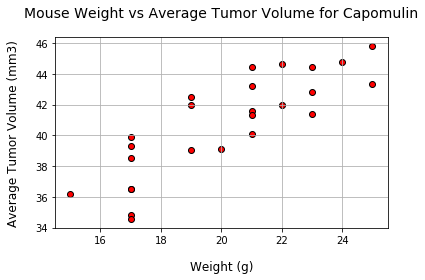

In [10]:
## Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Group the capomulin-treated mice data frame by Mouse ID and Weight
capomulin_grouped_mice = capomulin_mice.groupby(['Mouse ID', 'Weight (g)'])

# Calculate the average tumor volumes for this group
capomulin_tumor_volumes = capomulin_grouped_mice['Tumor Volume (mm3)'].mean()

# Save the results to a new data frame and reset the index to un-group it for plotting purposes
weight_vs_tumor_volumes = pd.DataFrame(capomulin_tumor_volumes).reset_index()

# Convert the weight and average tumor volumes to lists in order to calculate the correlation coefficient
avg_tumor_volumes = weight_vs_tumor_volumes['Tumor Volume (mm3)'].tolist()
mice_weight = weight_vs_tumor_volumes['Weight (g)'].values.tolist()

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = st.pearsonr(mice_weight, avg_tumor_volumes)
# Store the weight and average tumor volumes to respective Series' to compute the linear regression model
mice_weight_series = pd.Series(mice_weight) 
avg_tumor_volumes_series = pd.Series(avg_tumor_volumes)

# Calculate the linear regression model between mice weight and average tumor volumes
# The stats.lingress function returns the slope, intercept, r-value, p-value and stderr 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mice_weight_series, avg_tumor_volumes_series)

# Compute and store the regression values for the mice weight data
regress_values = mice_weight_series * slope + intercept

# Capture the linear regression line equation in the form: y = mx + c
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Draw a scatter plot of mice weight versus average tumor volume
scat_fig, scat_ax = plt.subplots()
scat_ax.scatter(mice_weight, avg_tumor_volumes, facecolors='red', edgecolors='black')
scat_ax.set_title('Mouse Weight vs Average Tumor Volume for Capomulin', fontsize=14, pad=20)
scat_ax.set_xlabel('Weight (g)', fontsize=12, labelpad=15)
scat_ax.set_ylabel('Average Tumor Volume (mm3)', fontsize=12, labelpad=15)
scat_ax.grid(True)
scat_fig.tight_layout()
plt.show()

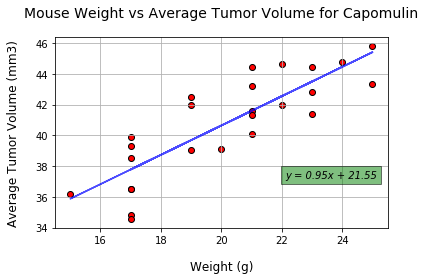

In [29]:
## Plot the linear regression model and line equation on top of the same scatter plot.

scat_fig, scat_ax = plt.subplots()
scat_ax.scatter(mice_weight, avg_tumor_volumes, facecolors='red', edgecolors='black')
scat_ax.set_title('Mouse Weight vs Average Tumor Volume for Capomulin', fontsize=14, pad=20)
scat_ax.set_xlabel('Weight (g)', fontsize=12, labelpad=15)
scat_ax.set_ylabel('Average Tumor Volume (mm3)', fontsize=12, labelpad=15)
scat_ax.plot(mice_weight_series, regress_values, 'r-', color='blue', alpha=0.7)
scat_ax.text(22.1, 37.2, line_equation, style='italic', bbox={'facecolor': 'green', 'alpha': 0.5})
scat_ax.grid(True)
scat_fig.tight_layout()
